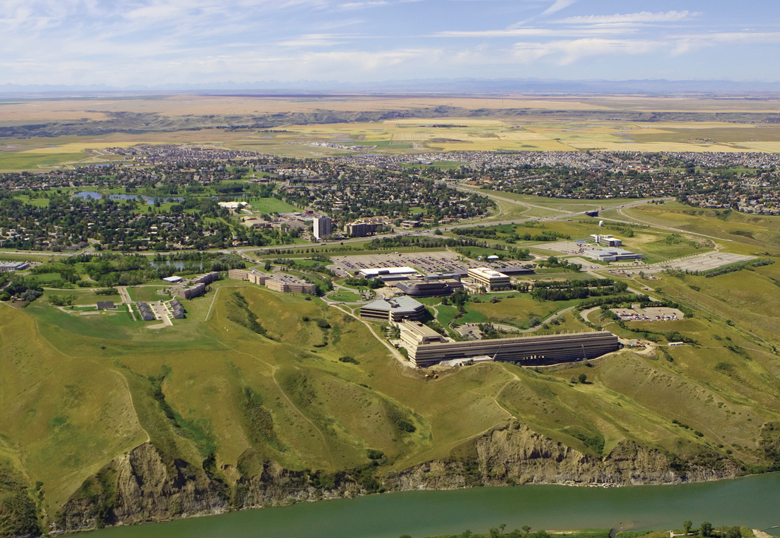

In [1]:
from PIL import Image
import requests
url = 'http://www.uleth.ca/unews/sites/default/files/DestinationProject-main.jpg'
im = Image.open(requests.get(url, stream=True).raw)
im

# Introduction to the opportunity

Lethbridg is a city in the province of Alberta, Canada, and the largest city in southern Alberta. It is Alberta's fourth-largest city by population after Calgary, Edmonton and Red Deer, and the third-largest by land area after Calgary and Edmonton. The nearby Canadian Rockies contribute to the city's warm summers, mild winters, and windy climate. Lethbridge lies southeast of Calgary on the Oldman River.

Lethbridge is the commercial, financial, transportation and industrial centre of southern Alberta. The city's economy developed from drift mining for coal in the late 19th century and agriculture in the early 20th century. Half of the workforce is employed in the health, education, retail and hospitality sectors, and the top five employers are government-based. The only university in Alberta south of Calgary is in Lethbridge, and two of the three colleges in southern Alberta have campuses in the city. Cultural venues in the city include performing art theatres, museums and sports centres.

As the city grows and develops, it becomes increasingly important to examine and understand it quantitiatively. The City of Lethbridg provides open data for everyone and encourages entrepreneurial use to develop services for the benefit of its ciitzens.

Developers, policy makers and/or city planners have an interest in answering the following questions:

1. What neighbourhoods have the highest crime?
2. Is population density correlated to crime level?
3. Using Foursquare data, what venues are most common in different locations within the city?
4. Does the Knowledge Park really need a coffee shop?


# Data
## To understand and explore we will need the following City of Lethbridg Open Data:
1. Open Data Site: http://opendata.lethbridge.ca
2. Lethbridg Neighbourhoods: http://opendata.lethbridge.ca/datasets/81568ca5241e409696f1bb59159eb4c6_0/data
3. Lethbridge_Regional_Police_Service Crime http://opendata.lethbridge.ca/datasets/4bef1636e1ce48ffac7981ca93dc7024
4. Lethbridg 2017_Census_Tract Demographics: http://opendata.lethbridge.ca/datasets/ad8515f52e864729b43fee0c33383fea_0/data
5. Lethbridg locations of interest for tourists: http://opendata.lethbridge.ca/datasets/881517dd7b4d443fadb9d9202775b139_0
6. Foursquare Developers Access to venue data: https://foursquare.com/
7. Using this data will allow exploration and examination to answer the questions. The neighbourhood data will enable us to properly group crime by neighbourhood. The Census data will enable us to then compare the population density to examine if areas of highest crime are also most densely populated. Lethbridg locations of interest will then allow us to cluster and quantitatively understand the venues most common to that location.

# Methodology


The methodology will include:

1. Loading each data set
2. Examine the crime frequency by neighbourhood
3. Study the crime types and then pivot analysis of crime type frequency by neighbourhood
4. Understand correlation between crimes and population density
5. Perform k-means statisical analysis on venues by locations of interest based on findings from crimes and neighbourhood
6. Determine which venues are most common statistically in the region of greatest crime count then in all other locations of interest.
7. Determine if an area, such as the Knowledge Park needs a coffee shop.

# Loading the data

After loading the applicable libraries, the referenced geojson neighbourhood data was loaded from the City of Lethbridg Open Data site. This dataset uses block polygon shape coordinates which are better for visualization and comparison. The City also uses Ward data but the Neighbourhood location data is more accurate and includes more details. The same type of dataset was then loaded for the population density from the Stats Canada Census tracts.

The third dataset, an excel file, "Regional_Police_Service" downloaded from the City of Lethbridg Open Data site is found under the Public Safety domain. This dataset was then uploaded for the analysis. It's interesting to note the details of this dataset are aggregated by neighbourhood. It is not an exhaustive set by not including all crimes (violent offenses) nor specific location data of the crime but is referenced by neighbourhood.

This means we can gain an understanding of the crime volume by type by area but not specific enough to understand the distribution properties. Valuable questions such as, "are these crimes occuring more often in a specific area and at a certain time by a specific demographic of people?" cannot be answered nor explored due to what is reasonably assumed to be personal and private information with associated legal risks.

There is value to the city to explore the detailed crime data using data science to predict frequency, location, timing and conditions to best allocated resources for the benefit of its citizens and it's police force. However, human behaviour is complex requiring thick profile data by individual and the conditions surrounding the event(s). To be sufficient for reliable future prediction it would need to demonstrate validity, currency, reliability and sufficiency.



# Exploring the data

Exploring the count of crimes by neighbourhood gives us the first glimpse into the distribution.

One note is the possibility neighbourhoods names could change at different times. The crime dataset did not mention which specific neighbourhood naming dataset it was using but we assumed the neighbourhood data provided aligned with the neighbourhoods used in the crime data. It may be beneficial for the City to note and timestamp neighbourhood naming in the future or simply reference with neighbourhood naming file it used for the crime dataset.

# First Visualization of Crime

Once the data was prepared, a choropleth map was created to view the crime count by neighbourhood. As expected the region of greatest crime count was found in the downtown and Platt neighbourhoods.

Examining the crime types enables us to learn the most frequent occuring crimes which we then plot as a bar chart to see most frequenty type.

Theft from motor vehicles is most prevalent in the same area as the most frequent crimes. It's interesting to note this area is mostly residential and most do not have garages. It would be interesting to further examine if surveillance is a deterant for motor vehicle crimes in the downtown core compared to low surveillance in the Platt neighbourhood.

# Examining 2nd most common crime given it is specific: theft from vehicles
After exploring the pivot table showing Crime_Type by Neighbourhood, we drill into a specific type of crime, theft from vehicles and plot the choropleth map to see which area has the greatest frequency.

Again, the Platt neighbourhood appears as the most frequent.

Is this due to population density?

# Look at specific locations to understand the connection to venues using Foursquare data

Loading the "Lethbridg Locations" data enables us to perform a statistical analysis on the most common venues by location.

We might wonder if the prevalence of bars and clubs in the downtown region has something to do with the higher crime rate in the  region.

Plotting the latitude and longitude coordinates of the locations of interest onto the crime choropleth map enables us to now study the most common venues by using the Foursquare data.

### Analysing each Location
Grouping rows by location and the mean of the frequency of occurance of each category we venue categories we study the top five most common venues.

Putting this data into a pandas dataframe we can then determine the most common venues by location and plot onto a map.

# Results

# Discussion and Recommendations

# Conclusion

# APPENDIX: Analysis
### Load Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

import folium # map rendering library

In [3]:
r = requests.get('https://opendata.arcgis.com/datasets/4888a2a1f23b423eb17d7d90000e1f25_0.geojson')
lethbridg_geo = r.json()

In [4]:
neighborhoods_data = lethbridg_geo['features']

In [5]:
neighborhoods_data[0]

{'geometry': {'coordinates': [[[-112.88064962342636, 49.69406740307125],
    [-112.88069639761554, 49.69418418602635],
    [-112.88074317153486, 49.69430097097128],
    [-112.88078994616379, 49.69441775388707],
    [-112.88083881325666, 49.69453975803897],
    [-112.88088558832855, 49.69465654120224],
    [-112.88093236362694, 49.694773324058204],
    [-112.88097698120758, 49.69488471235839],
    [-112.88102375693559, 49.695001495175944],
    [-112.88106837181498, 49.69511288369716],
    [-112.88064579767651, 49.69518410328151],
    [-112.88059883846223, 49.69519201757744],
    [-112.88064295219804, 49.6953034819864],
    [-112.88069040363594, 49.695295468121486],
    [-112.88111269074152, 49.69522414906077],
    [-112.88127397187361, 49.695166439851],
    [-112.88163312711423, 49.695037926560396],
    [-112.88173187002519, 49.69500259427992],
    [-112.88139483612558, 49.6948716300368],
    [-112.8811927365299, 49.69468837897014],
    [-112.88124402608983, 49.69447476328497],
    [-11

In [6]:
g = requests.get('https://opendata.arcgis.com/datasets/ad8515f52e864729b43fee0c33383fea_0.geojson')
demog_geo = g.json()

In [7]:
demog_data = demog_geo['features']
demog_data[0]

{'geometry': {'coordinates': [[[-112.83128882355645, 49.71274475970776],
    [-112.83107639940675, 49.71274441889567],
    [-112.82986883974984, 49.712748223664896],
    [-112.82884521068696, 49.71274505824992],
    [-112.82842738424641, 49.71274439686593],
    [-112.82717218820974, 49.712742470809054],
    [-112.82698607053354, 49.71274217213806],
    [-112.82577707525705, 49.712740275312704],
    [-112.82554474691014, 49.712739898795526],
    [-112.82481527675006, 49.712740710825194],
    [-112.82431948027912, 49.712737982743285],
    [-112.82410336765027, 49.71274923374665],
    [-112.82409770697089, 49.71382448066623],
    [-112.82409470537222, 49.71459995577966],
    [-112.82409102669013, 49.71647595429556],
    [-112.82423046144918, 49.716516043994034],
    [-112.82575709980884, 49.716519002348186],
    [-112.8271597707995, 49.71652161148098],
    [-112.82976532915887, 49.716526113692964],
    [-112.83102365484152, 49.716528307318555],
    [-112.832395188927, 49.716530563938406],

In [8]:
import os
os.listdir('.')

['.ipynb_checkpoints',
 '2017_Census_Tracts.csv',
 'Capstone project week 3__.ipynb',
 'Capstone project week 4_.ipynb',
 'Capstone Project week1.ipynb',
 'Capstone_Week5.pdf',
 'Lethbridge_Regional_Police_Service.csv',
 'Neighbourhoods.csv',
 'Picnic_Tables.csv',
 'Tourism.csv']

In [9]:
crime_df = pd.read_csv('Lethbridge_Regional_Police_Service.csv')

In [10]:
crime_df.head()

incident_id case_number       incident_datetime  \
0    759101024   P16017791  04/19/2016 08:21:40 PM   
1    759101020   P16017795  04/19/2016 08:42:25 PM   
2    759101018   P16017797  04/19/2016 08:47:56 PM   
3    759101017   P16017798  04/19/2016 08:48:48 PM   
4    759101015   P16017800  04/19/2016 09:01:57 PM   

                               incident_type_primary  \
0  SUSPICIOUS/WANTED (PERSON, CIRCUMSTANCES, VEHI...   
1                                              DRUGS   
2                               DISTURBANCE/NUISANCE   
3                               DISTURBANCE/NUISANCE   
4  PUBLIC SERVICE (LOCK IN/LOCK OUT, PEACE, WELFARE)   

                                incident_description  clearance_type  \
0  SUSPICIOUS/WANTED (PERSON, CIRCUMSTANCES, VEHI...             NaN   
1                                              DRUGS             NaN   
2                               DISTURBANCE/NUISANCE             NaN   
3                               DISTURBANCE/NUISANCE             NaN   
4  PUBLIC SERVICE (LOCK IN/LOCK OUT, PEACE, WELFARE)             NaN   

                     address_1  address_2        city state  zip  country  \
0       500 Block MOONLIGHT LN        NaN  LETHBRIDGE    AB  NaN      NaN   
1     4400 Block UNIVERSITY DR        NaN  LETHBRIDGE    AB  NaN      NaN   
2               100 Block 7 ST        NaN  LETHBRIDGE    AB  NaN      NaN   
3  3700 Block MAYOR MAGRATH DR        NaN  LETHBRIDGE    AB  NaN      NaN   
4        100 Block HERITAGE PL        NaN  LETHBRIDGE    AB  NaN      NaN   

    latitude   longitude              created_at              updated_at  \
0  49.664572 -112.901237  05/10/2016 10:29:59 AM  05/18/2016 12:47:31 PM   
1  49.676534 -112.861491  05/10/2016 10:29:59 AM  05/18/2016 12:47:32 PM   
2  49.697764 -112.836835  05/10/2016 10:29:59 AM  05/18/2016 12:47:33 PM   
3  49.656800 -112.788318  05/10/2016 10:29:59 AM  05/18/2016 12:47:33 PM   
4  49.692147 -112.878590  05/10/2016 10:29:59 AM  05/18/2016 12:47:33 PM   

                                     location  hour_of_day day_of_week  \
0  POINT (-112.901237474215 49.6645724065461)           20     Tuesday   
1   POINT (-112.861490752655 49.676533729066)           20     Tuesday   
2  POINT (-112.836834599215 49.6977636191803)           20     Tuesday   
3  POINT (-112.788318077537 49.6568002609669)           20     Tuesday   
4  POINT (-112.878589620848 49.6921469050725)           21     Tuesday   

  parent_incident_type  \
0   Community Policing   
1                Drugs   
2             Disorder   
3             Disorder   
4   Community Policing   

   Lethbridge Regional Police Service Beats Shapes - nce4-6239  
0                                           376805.0            
1                                           376805.0            
2                                           376802.0            
3                                           376804.0            
4                                           376805.0

## What is the crime count by neighbourhood?

In [11]:
crime_data = crime_df.groupby(['address_1']).size().to_frame(name='Count').reset_index()
crime_data

address_1  Count
0                                1 Block 1 AV    107
1                               1 Block 23 ST      1
2                                1 Block 3 ST     57
3                                1 Block 5 AV      1
4                             1 Block 9 21 W4      1
5                         1 Block ABERDEEN BY     25
6                         1 Block ABERDEEN RD     82
7                           1 Block ACADIA RD    220
8                        1 Block ALGONQUIN BY     39
9                        1 Block ALGONQUIN PL     17
10                       1 Block ALGONQUIN RD    103
11                       1 Block ALGONQUIN WY      1
12             1 Block ALMA ISOBELL HODDER CR     11
13                       1 Block APERATURE PK      6
14                        1 Block APERTURE DR      2
15                        1 Block APERTURE LP      3
16                        1 Block APERTURE PK     49
17                        1 Block APERTURE WY      1
18                       1 Block AQUITANIA BD     95
19                       1 Block AQUITANIA CI     13
20                      1 Block ASSINIBOIA RD     78
21                      1 Block ASSINIBOIA WY    105
22                       1 Block ATHABASCA RD     54
23                       1 Block ATHABASCA WY     84
24                                 1 Block AV     16
25                           1 Block AV 19 ST      1
26                     1 Block BEAVERBROOK BY     13
27                     1 Block BEAVERBROOK RD     77
28                      1 Block BEAVERPOND CT    116
29                       1 Block BEAVERRUN PL     44
30                        1 Block BERKELEY PL    877
31                       1 Block BLACKFOOT BD    235
32                       1 Block BLACKFOOT CI     71
33                       1 Block BLACKFOOT CR     80
34                       1 Block BLACKFOOT CT    107
35                       1 Block BLACKFOOT RD     98
36                       1 Block BLACKWOLF BY     17
37                         1 Block BLUEFOX BD     37
38                         1 Block BLUEFOX BY     22
39                         1 Block BLUEFOX PL     25
40                         1 Block BLUEFOX RD      5
41                 1 Block BOTTERIL BOTTOM RD     29
42                          1 Block BRIDGE DR      6
43                           1 Block BROCK PL    101
44                       1 Block CAMBRIDGE RD     62
45                          1 Block CANYON BD     85
46                          1 Block CANYON CL     43
47                          1 Block CANYON CT     37
48                  1 Block CANYON ESTATES LN      3
49                          1 Block CANYON GD      3
50                          1 Block CANYON GR      1
51                     1 Block CANYONCREST CT     40
52                     1 Block CANYONCREST PT     51
53                     1 Block CANYONCREST WY     26
54                        1 Block CARLETON PL    195
55                        1 Block CARLETON RD    135
56                 1 Block CASTLE MOUNTAIN RD      4
57                          1 Block CAYUGA CR    149
58                          1 Block CAYUGA PL     50
59                       1 Block CHILCOTIN CR     93
60                       1 Block CHILCOTIN LN     94
61                       1 Block CHILCOTIN RD    113
62                       1 Block CHILCOTIN WY     58
63                         1 Block CHINOOK HT     38
64                        1 Block CHIPPEWA CR     80
65                       1 Block COACHWOOD PT     66
66                       1 Block COACHWOOD RD     68
67                       1 Block COALBANKS GT     61
68                       1 Block COALBANKS LK     66
69                        1 Block COLUMBIA BD    177
70                        1 Block COLUMBIA BY     71
71                        1 Block COLUMBIA PL    104
72                       1 Block CONCORDIA PL     24
73                          1 Block COUGAR BY     20
74                          1 Block COUGAR CR     53
75      

In [12]:
crime_data.describe()

Count
count   2855.000000
mean      89.187741
std      462.501405
min        1.000000
25%       10.000000
50%       32.000000
75%       76.000000
max    22270.000000

In [13]:
crime_data.rename(index=str, columns={'address_1':'Neighbourh','Count':'Crime_Count'}, inplace=True)
crime_data

Neighbourh  Crime_Count
0                                1 Block 1 AV          107
1                               1 Block 23 ST            1
2                                1 Block 3 ST           57
3                                1 Block 5 AV            1
4                             1 Block 9 21 W4            1
5                         1 Block ABERDEEN BY           25
6                         1 Block ABERDEEN RD           82
7                           1 Block ACADIA RD          220
8                        1 Block ALGONQUIN BY           39
9                        1 Block ALGONQUIN PL           17
10                       1 Block ALGONQUIN RD          103
11                       1 Block ALGONQUIN WY            1
12             1 Block ALMA ISOBELL HODDER CR           11
13                       1 Block APERATURE PK            6
14                        1 Block APERTURE DR            2
15                        1 Block APERTURE LP            3
16                        1 Block APERTURE PK           49
17                        1 Block APERTURE WY            1
18                       1 Block AQUITANIA BD           95
19                       1 Block AQUITANIA CI           13
20                      1 Block ASSINIBOIA RD           78
21                      1 Block ASSINIBOIA WY          105
22                       1 Block ATHABASCA RD           54
23                       1 Block ATHABASCA WY           84
24                                 1 Block AV           16
25                           1 Block AV 19 ST            1
26                     1 Block BEAVERBROOK BY           13
27                     1 Block BEAVERBROOK RD           77
28                      1 Block BEAVERPOND CT          116
29                       1 Block BEAVERRUN PL           44
30                        1 Block BERKELEY PL          877
31                       1 Block BLACKFOOT BD          235
32                       1 Block BLACKFOOT CI           71
33                       1 Block BLACKFOOT CR           80
34                       1 Block BLACKFOOT CT          107
35                       1 Block BLACKFOOT RD           98
36                       1 Block BLACKWOLF BY           17
37                         1 Block BLUEFOX BD           37
38                         1 Block BLUEFOX BY           22
39                         1 Block BLUEFOX PL           25
40                         1 Block BLUEFOX RD            5
41                 1 Block BOTTERIL BOTTOM RD           29
42                          1 Block BRIDGE DR            6
43                           1 Block BROCK PL          101
44                       1 Block CAMBRIDGE RD           62
45                          1 Block CANYON BD           85
46                          1 Block CANYON CL           43
47                          1 Block CANYON CT           37
48                  1 Block CANYON ESTATES LN            3
49                          1 Block CANYON GD            3
50                          1 Block CANYON GR            1
51                     1 Block CANYONCREST CT           40
52                     1 Block CANYONCREST PT           51
53                     1 Block CANYONCREST WY           26
54                        1 Block CARLETON PL          195
55                        1 Block CARLETON RD          135
56                 1 Block CASTLE MOUNTAIN RD            4
57                          1 Block CAYUGA CR          149
58                          1 Block CAYUGA PL           50
59                       1 Block CHILCOTIN CR           93
60                       1 Block CHILCOTIN LN           94
61                       1 Block CHILCOTIN RD          113
62                       1 Block CHILCOTIN WY           58
63                         1 Block CHINOOK HT           38
64                        1 Block CHIPPEWA CR           80
65                       1 Block COACHWOOD PT           66
66                       1 Block COACHWOOD RD           68
67                     

In [14]:
address = 'Lethbridge, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lethbridge  is {}, {}.'.format(latitude, longitude))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Lethbridge  is 49.694285, -112.851562.


In [15]:
world_geo = r'world_countries.json' # geojson file

lethbridge_1_map = folium.Map(location=[49.694285, -112.851562], width=1000, height=750,zoom_start=12)

lethbridge_1_map

In [16]:
#lethbridge_geo = r.json()

#threshold_scale = np.linspace(crime_data['Crime_Count'].min(),crime_data['Crime_Count'].max(), 6,dtype=int)
#threshold_scale = threshold_scale.tolist()
#threshold_scale[-1] = threshold_scale[-1]+1

#lethbridge_1_map.choropleth(geo_data=lethbridge_geo, data=crime_data,columns=['Neighbourh', 'Crime_Count'],
   # key_on='feature.properties.Neighbourh', threshold_scale=threshold_scale,fill_color='YlOrRd', fill_opacity=0.7, 
   # line_opacity=0.1, legend_name='lethbridge Neighbourhoods')

#lethbridge_1_map

# Examine Crime Types

In [17]:
crimetype_data = crime_df.groupby(['incident_type_primary']).size().to_frame(name='Count').reset_index()
crimetype_data

incident_type_primary  Count
0   "ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPE...    815
1      "BOMB FOUND/SUSPICIOUS PACKAGE (LETTER, ITEM)"     21
2   "PUBLIC SERVICE (LOCK IN/LOCK OUT, PEACE, WELF...   9147
3   "SUSPICIOUS/WANTED (PERSON, CIRCUMSTANCES, VEH...   8598
4                              ABDUCTION (KIDNAPPING)    157
5   ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPER...   1575
6                                              ALARMS  21636
7                                              ANIMAL   2110
8                                             ASSAULT   6839
9                               ASSIST OTHER AGENCIES   5881
10       BOMB FOUND/SUSPICIOUS PACKAGE (LETTER, ITEM)     25
11                                        BOMB THREAT     19
12       BURGLARY (BREAK - AND - ENTER)/HOME INVASION   4319
13                        CITIZEN ASSIST/SERVICE CALL      3
14                          DAMAGE/VANDALISM/MISCHIEF   9396
15                                    DECEASED PERSON    844
16                               DISTURBANCE/NUISANCE  49865
17     DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)   7606
18                                              DRUGS   4078
19                                          EXPLOSION     10
20                                    FRAUD/DECEPTION   5452
21                        HARRASSMENT/STALKING/THREAT   6445
22                                 INDECENCY/LEWDNESS   1154
23              MENTAL DISORDER (BEHAVIORAL PROBLEMS)   1422
24                                      MISCELLANEOUS    542
25                       MISSING/RUNAWAY/FOUND PERSON   4483
26  PUBLIC SERVICE (LOCK IN/LOCK OUT, PEACE, WELFARE)   6191
27                                            ROBBERY    578
28                                 ROBBERY/CARJACKING      6
29                                     SEXUAL ASSAULT   1278
30  SUSPICIOUS/WANTED (PERSON, CIRCUMSTANCES, VEHI...  14035
31                                    THEFT (LARCENY)  22326
32                                 THEFT FROM VEHICLE   5968
33                                   THEFT OF VEHICLE     18
34                                    TRAFFIC PURSUIT     10
35                 TRAFFIC VIOLATION/COMPLAINT/HAZARD  35511
36                               TRESPASSING/UNWANTED  13953
37                                  UNKNOWN 3RD PARTY    357
38                                   WEAPONS/FIREARMS   1960

In [18]:
crimetype_data.describe()

Count
count     39.000000
mean    6529.051282
std    10319.715245
min        3.000000
25%      449.500000
50%     2110.000000
75%     7222.500000
max    49865.000000

In [19]:
crimepivot = crime_df.pivot_table(index='address_1', columns='incident_type_primary', aggfunc=pd.Series.count, fill_value=0)

In [20]:
crimepivot.head()

Lethbridge Regional Police Service Beats Shapes - nce4-6239  \
incident_type_primary "ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPERTY, MESSAGES, TRANSPORTS)"   
address_1                                                                                         
1 Block 1 AV                                                           0                          
1 Block 23 ST                                                          0                          
1 Block 3 ST                                                           0                          
1 Block 5 AV                                                           0                          
1 Block 9 21 W4                                                        0                          

                                                                      \
incident_type_primary "BOMB FOUND/SUSPICIOUS PACKAGE (LETTER, ITEM)"   
address_1                                                              
1 Block 1 AV                                                       0   
1 Block 23 ST                                                      0   
1 Block 3 ST                                                       0   
1 Block 5 AV                                                       0   
1 Block 9 21 W4                                                    0   

                                                                           \
incident_type_primary "PUBLIC SERVICE (LOCK IN/LOCK OUT, PEACE, WELFARE)"   
address_1                                                                   
1 Block 1 AV                                                           9    
1 Block 23 ST                                                          0    
1 Block 3 ST                                                           5    
1 Block 5 AV                                                           1    
1 Block 9 21 W4                                                        1    

                                                                            \
incident_type_primary "SUSPICIOUS/WANTED (PERSON, CIRCUMSTANCES, VEHICLE)"   
address_1                                                                    
1 Block 1 AV                                                           5     
1 Block 23 ST                                                          0     
1 Block 3 ST                                                           0     
1 Block 5 AV                                                           0     
1 Block 9 21 W4                                                        0     

                                              \
incident_type_primary ABDUCTION (KIDNAPPING)   
address_1                                      
1 Block 1 AV                               0   
1 Block 23 ST                              0   
1 Block 3 ST                               0   
1 Block 5 AV                               0   
1 Block 9 21 W4                            0   

                                                                                               \
incident_type_primary ADMINISTRATIVE (DOCUMENT, LOST OR FOUND PROPERTY, MESSAGES, TRANSPORTS)   
address_1                                                                                       
1 Block 1 AV                                                           1                        
1 Block 23 ST                                                          0                        
1 Block 3 ST                                                           1                        
1 Block 5 AV                                                           0                        
1 Block 9 21 W4                                                        0                        

                                                                   \
incident_type_primary ALARMS ANIMAL ASSAULT ASSIST OTHER AGENCIES   
address_1                                                           
1 Block 1 AV              10      2       1            

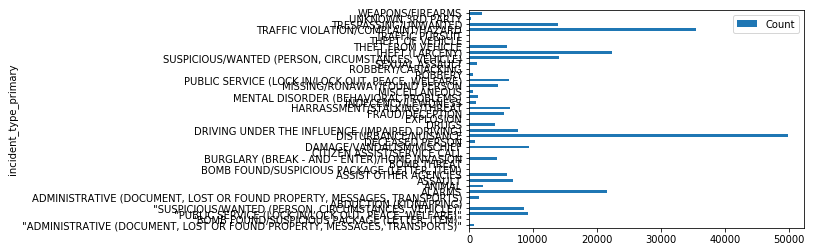

In [21]:
%matplotlib inline
crimetype_data.plot(x='incident_type_primary', y='Count', kind='barh')

# Let's examine theft from DRIVING UNDER THE INFLUENCE 

In [22]:
mvcrime_df = crime_df.loc[crime_df['incident_type_primary'] == 'DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)']
mvcrime_df.head()

incident_id case_number       incident_datetime  \
97     737406440   P15056335  11/15/2015 03:55:08 PM   
167    784598623   P16055807  12/06/2016 09:23:13 PM   
185    737553560   P15056437  11/16/2015 01:21:11 PM   
205    737553529   P15056475  11/16/2015 06:24:51 PM   
255    760711981   P16023923  05/27/2016 05:35:49 PM   

                              incident_type_primary  \
97   DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)   
167  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)   
185  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)   
205  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)   
255  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)   

                               incident_description  clearance_type  \
97   DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)             NaN   
167  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)             NaN   
185  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)             NaN   
205  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)             NaN   
255  DRIVING UNDER THE INFLUENCE (IMPAIRED DRIVING)             NaN   

                 address_1  address_2        city state  zip  country  \
97   600 Block COLUMBIA BD        NaN  LETHBRIDGE    AB  NaN      NaN   
167         300 Block 8 ST        NaN  LETHBRIDGE    AB  NaN      NaN   
185    300 Block CANYON BD        NaN  LETHBRIDGE    AB  NaN      NaN   
205         500 Block 4 AV        NaN  LETHBRIDGE    AB  NaN      NaN   
255       2900 Block 26 AV        NaN  LETHBRIDGE    AB  NaN      NaN   

      latitude   longitude              created_at              updated_at  \
97   49.670584 -112.890371  11/16/2015 11:33:26 AM  11/28/2015 01:46:07 PM   
167  49.695317 -112.835958  12/10/2016 11:48:43 AM  01/04/2017 01:46:30 PM   
185  49.646415 -112.834012  11/17/2015 11:33:16 AM  11/29/2015 01:45:56 PM   
205  49.694124 -112.839507  11/17/2015 11:33:16 AM  11/29/2015 01:45:57 PM   
255  49.727297 -112.799484  05/28/2016 10:31:40 AM  06/25/2016 12:47:41 PM   

                                       location  hour_of_day day_of_week  \
97   POINT (-112.890371206668 49.6705842865693)           15      Sunday   
167  POINT (-112.835958235218 49.6953174647496)           21     Tuesday   
185   POINT (-112.834011552949 49.646415367804)           13      Monday   
205   POINT (-112.83950720247 49.6941238682054)           18      Monday   
255  POINT (-112.799483501368 49.7272969284806)           17      Friday   

    parent_incident_type  \
97                Liquor   
167               Liquor   
185               Liquor   
205               Liquor   
255               Liquor   

     Lethbridge Regional Police Service Beats Shapes - nce4-6239  
97                                            376805.0            
167                                           376802.0            
185                                           376805.0            
205                                           376802.0            
255                                           376800.0

In [23]:
mvcrime_data = mvcrime_df.groupby(['address_1']).size().to_frame(name='Count').reset_index()
mvcrime_data

address_1  Count
0                        1 Block 1 AV      1
1                   1 Block ACADIA RD      2
2                1 Block ALGONQUIN BY      1
3                1 Block ALGONQUIN RD      1
4                1 Block AQUITANIA BD      7
5               1 Block ASSINIBOIA WY      2
6                          1 Block AV      1
7                1 Block BEAVERRUN PL      2
8                 1 Block BERKELEY PL      7
9                1 Block BLACKFOOT BD      5
10               1 Block BLACKFOOT CT      1
11               1 Block BLACKFOOT RD      1
12               1 Block BLACKWOLF BY      2
13                 1 Block BLUEFOX BD      1
14                   1 Block BROCK PL      2
15                  1 Block CANYON BD      1
16          1 Block CANYON ESTATES LN      1
17             1 Block CANYONCREST PT      2
18                  1 Block CAYUGA CR      2
19               1 Block CHILCOTIN RD      1
20               1 Block CHILCOTIN WY      1
21                1 Block CHIPPEWA CR      1
22               1 Block COACHWOOD PT      1
23               1 Block COALBANKS LK      2
24                1 Block COLUMBIA BD      1
25                1 Block COLUMBIA PL      3
26                1 Block COWICHAN CT      1
27                  1 Block DAKOTA RD      1
28       1 Block DOROTHY GENTLEMAN CR      1
29                   1 Block EAGLE RD      1
30               1 Block EDINBURGH WY      1
31              1 Block ERMINEDALE BY      2
32              1 Block ERMINEGLEN RD      1
33                1 Block FAIRMONT CV      1
34                1 Block FAIRMONT LK      1
35           1 Block FAIRMONT PARK LN      2
36                1 Block FAIRMONT PT      1
37                1 Block FAIRMONT RD      1
38                 1 Block FOXBEND CR      7
39           1 Block HARU MORIYAMA RD      3
40                 1 Block HARVARD CR      1
41               1 Block HAWTHORNE PL      2
42                 1 Block HEATHER RD      1
43                1 Block HERITAGE CT      1
44                1 Block HERITAGE LN      1
45                1 Block HERITAGE RD      2
46               1 Block HIGHLANDS PL      1
47             1 Block JERRY POTTS BD      6
48         1 Block JESSIE ROBINSON CL      1
49                1 Block KEYSTONE TE      2
50                  1 Block KODIAK CR      1
51                1 Block KOOTENAY PL      1
52               1 Block LAFAYETTE BD      1
53               1 Block LAFAYETTE CR      2
54                   1 Block LAVAL BD      2
55                   1 Block LAVAL RD      1
56                 1 Block LEMOYNE CR      5
57           1 Block LETTICE PERRY PL      1
58              1 Block MAURETANIA RD      3
59                  1 Block MCGILL BD      5
60              1 Block MEADOWLARK BD      2
61                  1 Block MICMAC BD     21
62                  1 Block MICMAC CT      2
63                  1 Block MICMAC PL      1
64                 1 Block MODESTO RD      1
65                  1 Block MOHAWK RD      3
66             1 Block MOUNT ROYAL PL      1
67             1 Block MT ALDERSON CR      3
68            1 Block MT BLAKISTON RD      6
69                1 Block MT BURKE BD      5
70             1 Block MT CRANDELL CR      1
71               1 Block MT RUNDLE RD      2
72              1 Block MT SUNDIAL CT      1
73                1 Block NEBRASKA RD      1
74                  1 Block NEVADA RD      3
75                  1 Block OXFORD RD      2
76                  1 Block PEIGAN CT      1
77               1 Block PENSACOLA CT      1
78               1 Block PRINCETON CR      2
79               1 Block PRINCETON RD      1
80                  1 Block PURDUE CT      1
81               1 Block RIDGEWOOD CR      1
82              1 Block RIVERGREEN RD      1
83              1 Block RIVERHURST CV      1
84               1 Block RIVERLAND CL      3
85               1 Block RIVERPARK BD      1
86              1 Block RIVERSTONE BD      1
87          1 Block ROCKY MOUNTAIN BD      2
88                 1 Bl

In [24]:
mvcrime_data.rename(index=str, columns={'address_1':'Neighbourh','Count':'MVCrime_Count'}, inplace=True)
mvcrime_data

Neighbourh  MVCrime_Count
0                        1 Block 1 AV              1
1                   1 Block ACADIA RD              2
2                1 Block ALGONQUIN BY              1
3                1 Block ALGONQUIN RD              1
4                1 Block AQUITANIA BD              7
5               1 Block ASSINIBOIA WY              2
6                          1 Block AV              1
7                1 Block BEAVERRUN PL              2
8                 1 Block BERKELEY PL              7
9                1 Block BLACKFOOT BD              5
10               1 Block BLACKFOOT CT              1
11               1 Block BLACKFOOT RD              1
12               1 Block BLACKWOLF BY              2
13                 1 Block BLUEFOX BD              1
14                   1 Block BROCK PL              2
15                  1 Block CANYON BD              1
16          1 Block CANYON ESTATES LN              1
17             1 Block CANYONCREST PT              2
18                  1 Block CAYUGA CR              2
19               1 Block CHILCOTIN RD              1
20               1 Block CHILCOTIN WY              1
21                1 Block CHIPPEWA CR              1
22               1 Block COACHWOOD PT              1
23               1 Block COALBANKS LK              2
24                1 Block COLUMBIA BD              1
25                1 Block COLUMBIA PL              3
26                1 Block COWICHAN CT              1
27                  1 Block DAKOTA RD              1
28       1 Block DOROTHY GENTLEMAN CR              1
29                   1 Block EAGLE RD              1
30               1 Block EDINBURGH WY              1
31              1 Block ERMINEDALE BY              2
32              1 Block ERMINEGLEN RD              1
33                1 Block FAIRMONT CV              1
34                1 Block FAIRMONT LK              1
35           1 Block FAIRMONT PARK LN              2
36                1 Block FAIRMONT PT              1
37                1 Block FAIRMONT RD              1
38                 1 Block FOXBEND CR              7
39           1 Block HARU MORIYAMA RD              3
40                 1 Block HARVARD CR              1
41               1 Block HAWTHORNE PL              2
42                 1 Block HEATHER RD              1
43                1 Block HERITAGE CT              1
44                1 Block HERITAGE LN              1
45                1 Block HERITAGE RD              2
46               1 Block HIGHLANDS PL              1
47             1 Block JERRY POTTS BD              6
48         1 Block JESSIE ROBINSON CL              1
49                1 Block KEYSTONE TE              2
50                  1 Block KODIAK CR              1
51                1 Block KOOTENAY PL              1
52               1 Block LAFAYETTE BD              1
53               1 Block LAFAYETTE CR              2
54                   1 Block LAVAL BD              2
55                   1 Block LAVAL RD              1
56                 1 Block LEMOYNE CR              5
57           1 Block LETTICE PERRY PL              1
58              1 Block MAURETANIA RD              3
59                  1 Block MCGILL BD              5
60              1 Block MEADOWLARK BD              2
61                  1 Block MICMAC BD             21
62                  1 Block MICMAC CT              2
63                  1 Block MICMAC PL              1
64                 1 Block MODESTO RD              1
65                  1 Block MOHAWK RD              3
66             1 Block MOUNT ROYAL PL              1
67             1 Block MT ALDERSON CR              3
68            1 Block MT BLAKISTON RD              6
69                1 Block MT BURKE BD              5
70             1 Block MT CRANDELL CR              1
71               1 Block MT RUNDLE RD              2
72              1 Block MT SUNDIAL CT              1
73                1 Block NEBRASKA RD              1
74                  1 Block NEVADA RD              3

In [25]:
world_geo = r'world_countries.json' # geojson file

lethbridge_c_map = folium.Map(location=[49.694285, -112.851562], width=1000, height=750,zoom_start=12)

lethbridge_c_map

In [26]:
## DRIVING UNDER THE INFLUENCE
lethbridge_geo = r.json()
threshold_scale = np.linspace(mvcrime_data['MVCrime_Count'].min(), mvcrime_data['MVCrime_Count'].max(),6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

lethbridge_c_map.choropleth(geo_data=lethbridge_geo,data=mvcrime_data,columns=['Neighbourh', 'MVCrime_Count'],
    threshold_scale=threshold_scale, fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.1,legend_name='Lethbridge Neighbourhoods')
lethbridge_c_map

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Is it possible the higher rate of crime in the downtown area is due to population density?

In [27]:
demog_df  = pd.read_csv('2017_Census_Tracts.csv')
demog_df.head()

OBJECTID  TRACTID  MU01  FU01  NIDU01  TOTALU01  M01  F01  NID01  TOTAL01  \
0         1      103     5     3       0         8    3    4      0        7   
1         2      106     3     1       0         4    2    3      0        5   
2         3      214     4     3       0         7    2    2      0        4   
3         4      302     2     1       0         3    2    1      0        3   
4         5      303     3     2       0         5    0    4      0        4   

   M02  F02  NID02  TOTAL02  M03  F03  NID03  TOTAL03  M04  F04  NID04  \
0    5    2      0        7    2    2      0        4    2    5      0   
1    1    0      0        1    4    4      0        8    3    5      0   
2    0    2      0        2    1    1      0        2    3    2      0   
3    3    5      0        8    2    2      0        4    3    1      0   
4    1    2      0        3    0    3      0        3    4    2      0   

   TOTAL04  M05  F05  NID05  TOTAL05  M06  F06  NID06  TOTAL06  M7_9  F7_9  \
0        7    5    5      0       10    3    4      0        7    10     4   
1        8    4    3      0        7    3    0      0        3     6     8   
2        5    3    1      0        4    2    1      0        3     7     8   
3        4    3    1      0        4    1    1      0        2     6     5   
4        6    0    2      0        2    1    4      0        5    11     9   

   NID7_9  TOTAL7_9  M10_14  F10_14  NID10_14  TOTAL10_14  M15_17  F15_17  \
0       0        14      17      19         0          36       7       8   
1       0        14      13      14         0          27       2       6   
2       0        15      13      11         0          24      15       8   
3       0        11       6       3         0           9       5       7   
4       0        20      10      13         0          23      10       6   

   NID15_17  TOTAL15_17  M18_19  F18_19  NID18_19  TOTAL18_19  M20_24  F20_24  \
0         0          15       5      14         0          19      17      25   
1         0           8       3       3         0           6      23      23   
2         0          23       3       6         0           9      15      18   
3         0          12       2       3         0           5       6       8   
4         0          16       3       4         0           7       9       9   

   NID20_24  TOTAL20_24  M25_29  F25_29  NID25_29  TOTAL25_29  M30_34  F30_34  \
0         0          42      25      23         0          48      29      24   
1         0          46      23      14         0          37      22      21   
2         0          33      17      19         0          36      17      15   
3         0          14       9      10         0          19      11       7   
4         0          18      18      15         0          33      15      19   

   NID30_34  TOTAL30_34  M35_39  F35_39  NID35_39  TOTAL35_39  M40_44  F40_44  \
0         0          53      22      23         0          45      15      15   
1         0          43      26      15         0          41      14      12   
2         0          32      10      14         0          24      16      12   
3         0          18      12       6         0          18       8      10   
4         0          34      12       8         0          20      17      12   

   NID40_44  TOTAL40_44  M45_49  F45_49  NID45_49  TOTAL45_49  M50_54  F50_54  \
0         0          30      15      11         0          26      23      15   
1         0          26      10      17         0          27      16      14   
2         0          28       7       9         0          16      16      11   
3         0          18       8       9         0          17      13      12   
4         0          29       7       9         0          16      19      11   

   NID50_54  TOTAL50_54  M55_59  F55_59  NID55_59  TOTAL55_59  M60_64  F60_64  \
0         0          38      29      26         0          55      19      18   
1         0          30      16    

In [28]:
world_geo = r'world_countries.json' # geojson file

lethbridge_d_map = folium.Map(location=[49.694285, -112.851562], width=1000, height=750,zoom_start=12)
lethbridge_d_map

#threshold_scale = np.linspace(demog_df['CTOTAL'].min(),demog_df['CTOTAL'].max(),6,dtype=int)
#threshold_scale = threshold_scale.tolist()
#threshold_scale[-1] = threshold_scale[-1]+1

lethbridge_d_map.choropleth(geo_data=demog_geo,
                            data=demog_df,
                            columns=['OBJECTID','CTOTAL'],
                            key_on='feature.id',
                            fill_color='PuBuGn',
                            fill_opacity=0.7, 
                            line_opacity=0.1,
                            legend_name='Lethbridge Population Density')
folium.LayerControl().add_to(lethbridge_d_map)
lethbridge_d_map

### Let's look at specific locations in Lethbridge

In [29]:
location_df  = pd.read_csv('Tourism.csv')
location_df.head()

X          Y  OBJECTID                               Name  \
0 -112.803294  49.687450         1         Nikka Yuko Japanese Garden   
1 -112.832079  49.694065         2              Yates Memorial Centre   
2 -112.838470  49.696172         3       Southern Alberta Art Gallery   
3 -112.847058  49.692472         4           Galt Museum and Archives   
4 -112.856726  49.691920         6  Fort Whoop-Up Interpretive Centre   

                        Address           Type       LocationMethod  \
0  Mayor Magrath Dr and 9 Ave S  Cultural Site  Heads Up Digitizing   
1                  1002 4 Ave S        Theatre  Heads Up Digitizing   
2                   601 3 Ave S    Arts Centre  Heads Up Digitizing   
3                       5 Ave S         Museum  Heads Up Digitizing   
4            Indian Battle Park  Historic Site  Heads Up Digitizing   

                                   Url  Created_Date             Modified_Date  
0   http://www.nikkayuko.com/index.asp           NaN  2017-01-10T00:00:00.000Z  
1           http://www.enmaxcentre.ca/           NaN  2017-01-10T00:00:00.000Z  
2                     https://saag.ca/           NaN  2017-01-10T00:00:00.000Z  
3              https://galtmuseum.com/           NaN  2017-01-10T00:00:00.000Z  
4  http://galtmuseum.com/fort-whoop_up           NaN  2017-01-10T00:00:00.000Z

In [30]:
world_geo = r'world_countries.json' # geojson file

lethbridge_c_map = folium.Map(location=[49.694285, -112.851562], width=1000, height=750,zoom_start=12)

lethbridge_c_map

for lat, lng, point in zip(location_df['Y'], location_df['X'], location_df['Name']):
    label = '{}'.format(point)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radium=1,popup=label,color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,
        parse_html=False).add_to(lethbridge_c_map)
lethbridge_c_map

In [31]:
picnic_df  = pd.read_csv('Picnic_Tables.csv')
picnic_df.head()

X          Y  OBJECTID    AssetID  Status Material  \
0 -112.849747  49.697221         1  PksTabl_1  Active     Wood   
1 -112.849697  49.697229         2  PksTabl_2  Active     Wood   
2 -112.810272  49.729048         3  PksTabl_3  Active     Wood   
3 -112.809954  49.728854         4  PksTabl_4  Active     Wood   
4 -112.809688  49.731784         5  PksTabl_5  Active     Wood   

           Surface Accessible Plaque Dedication  Dedication_Date       Owner  \
0               No        Yes     No        NaN              NaN  City-Parks   
1               No        Yes     No        NaN              NaN  City-Parks   
2  Concrete Poured         No     No        NaN              NaN  City-Parks   
3  Concrete Poured         No     No        NaN              NaN  City-Parks   
4  Concrete Poured         No     No        NaN              NaN  City-Parks   

              Asset_Install                       Grnspc_ID  \
0  2009-05-20T00:00:00.000Z    Brewery Gardens - GrnSpc_626   
1  2009-05-20T00:00:00.000Z    Brewery Gardens - GrnSpc_626   
2  2009-06-16T00:00:00.000Z  Chinook Lake Park - GrnSpc_893   
3  2009-06-16T00:00:00.000Z  Chinook Lake Park - GrnSpc_893   
4  2009-06-16T00:00:00.000Z  Chinook Lake Park - GrnSpc_893   

               Comment             Modified_Date  
0  weathered, carvings  2018-02-15T00:00:00.000Z  
1           weathered   2018-02-15T00:00:00.000Z  
2            carvings   2018-02-15T00:00:00.000Z  
3                       2018-02-15T00:00:00.000Z  
4                  NaN  2018-02-15T00:00:00.000Z

In [32]:
for lat, lng, point in zip(picnic_df['Y'], picnic_df['X'], picnic_df['OBJECTID']):
    label = '{}'.format(point)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],radium=1,popup=label,color='green',fill=True,fill_color='#3186cc',fill_opacity=0.7,
        parse_html=False).add_to(lethbridge_c_map)
lethbridge_c_map